In [26]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as mano
from sklearn.impute import SimpleImputer

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
# Reading the dataset
data = pd.read_csv(r'Documents/Bank.Marketing.Campaign/bank-additional-full.csv')

In [28]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [29]:
data.shape

(41188, 21)

There are 41188 rows with 21 columns

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [31]:
#Checking for inconsistent values
data.mask(data=='-', None).ffill()
data.mask(data=='nan', None).ffill()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


In [32]:
#Checking for null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no missing values in the dataset

In [33]:
#Describing Numerical Variables
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


Now we will create displots see distribution of numerical/quantitative variables

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

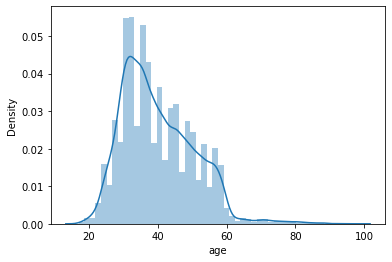

In [34]:
#Lets plot graphs to see the distribution 
plt.figure()
sns.distplot(data['age'])

The column of age somewhat follows a normal distribution

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

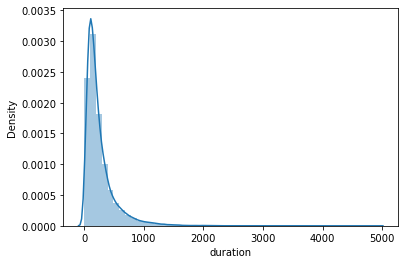

In [35]:
#Lets plot graphs to see the distribution 
plt.figure()
sns.distplot(data['duration'])

The column of duration is highly positively skewed 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='campaign', ylabel='Density'>

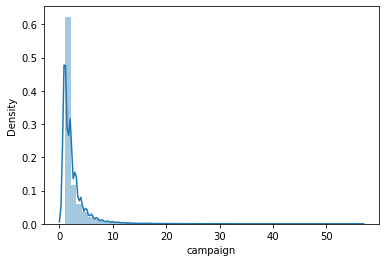

In [36]:
#Lets plot graphs to see the distribution 
plt.figure()
sns.distplot(data['campaign'])

The column of campaign is also highly skewed

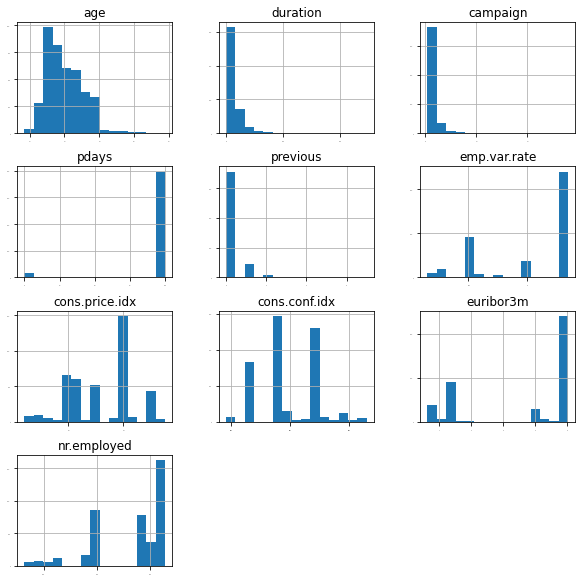

In [37]:
data.hist(bins = 15, figsize = (10,10), xlabelsize = 0.1, ylabelsize = 0.1)
plt.show()

None of the quantitative variables follow a normal distribution except age (to some extent) and maybe cons.conf.idx. Rest all are highly skewed

In [38]:
data.pdays.value_counts(normalize=True)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
19     0.000073
22     0.000073
21     0.000049
20     0.000024
25     0.000024
26     0.000024
27     0.000024
Name: pdays, dtype: float64

Values of pdays column shows very little variation. Most of the values consist of 999 which means client was not previously contacted. It does not give us much information. Therefore, it is better to drop.

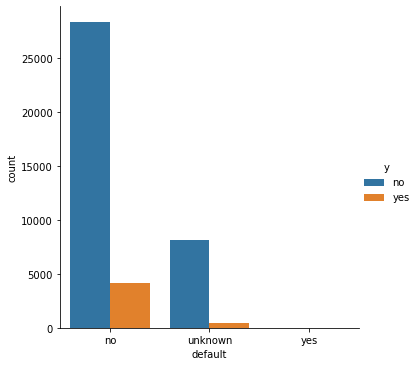

In [39]:
sns.catplot(x='default',hue='y',kind='count',data=data)

In [40]:
pd.crosstab(data['default'], data.y)

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


Dropping default column is better because all values of default are no or unknown. It does not give much information.

In [41]:
data.y.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Deposit Distributions \n (0: No || 1: Yes)')

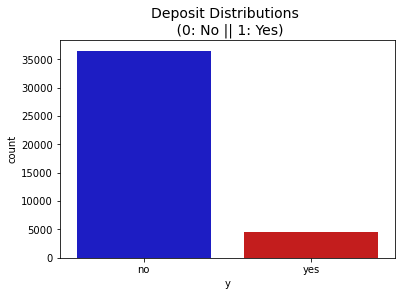

In [42]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('y', data=data, palette=colors)
plt.title('Deposit Distributions \n (0: No || 1: Yes)', fontsize=14)

From the above distribution we can be sure that the data is imbalanced, as the number of "no"s are also 8 times the number of "yes".

<AxesSubplot:>

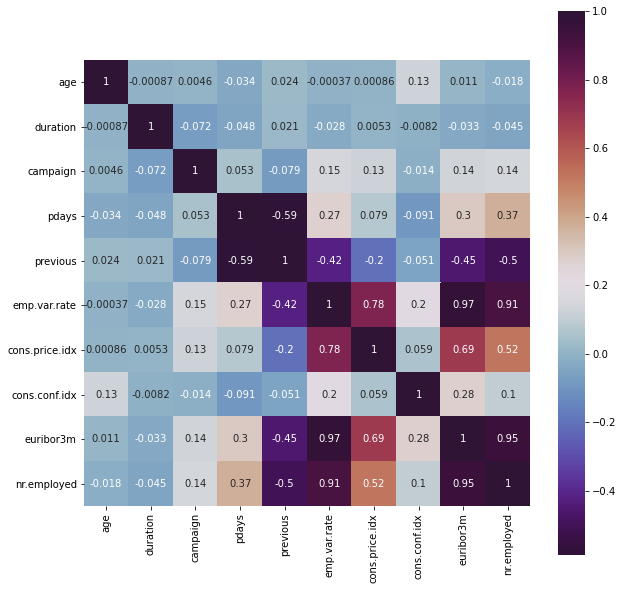

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),square=True,annot=True,cmap= 'twilight_shifted')

emp.var.rate, nr.employed and euribor3m are highly correlated. Since multicollinearity is not a problem, we decide to keep them.

In [44]:
pd.crosstab(data['marital'],data['y'])

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


Most of the clients who will subscribe a term deposit are shown to be married

In [45]:
pd.crosstab(data['housing'],data['y'])

y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


There is a high percentage of people who are likely to subscribe to have their own housing. But results are little ambigious here because a higher percentage of people have their own housing but still they do not choose to subscribe. We can remove this column for this sake. 

In [46]:
pd.crosstab(data['loan'],data['y'])

y,no,yes
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


EDA is completed. We have decided to remove columns: 
    
pdays, house, and default. Rest of the relationships can be determined in the BI charts. 